## 🧪 Binary Classification with the Iris Dataset

Create a binary classification model that classifies samples into one of two classes based on the provided dataset. We will use the Iris dataset to predict whether a given flower is of the species *Iris-Virginica* or not. For this task, we will use the `LogisticRegression` classifier from the `scikit-learn` library.

We will use the popular Iris flower dataset, which is available in `scikit-learn`. The dataset contains information about three species of iris: *Iris-Setosa*, *Iris-Versicolour*, and *Iris-Virginica*. Each sample is described by four features: sepal length, sepal width, petal length, and petal width.

### Steps to Follow:

1. **Loading and preparing the data:**
    - Load the Iris dataset from `scikit-learn`.
    - Create new binary labels, where the value 1 indicates "Iris-Virginica" and 0 indicates the other species.

2. **Splitting the data:**
    - Split the dataset into training and test sets.

3. **Training the model:**
    - Train an `SGDClassifier` model on the training data.

4. **Evaluating the model:**
    - Make predictions on the test set and evaluate the performance, including classification report and confusion matrix with visualizations.

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
print(iris)

X = iris.data
y = (iris.target == 2).astype(int)  # 1 if Iris-Virginica, else 0

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Classification Report for 'Iris-Virginica':

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.65      1.00      0.79        11

    accuracy                           0.80        30
   macro avg       0.82      0.84      0.80        30
weighted avg       0.87      0.80      0.80        30



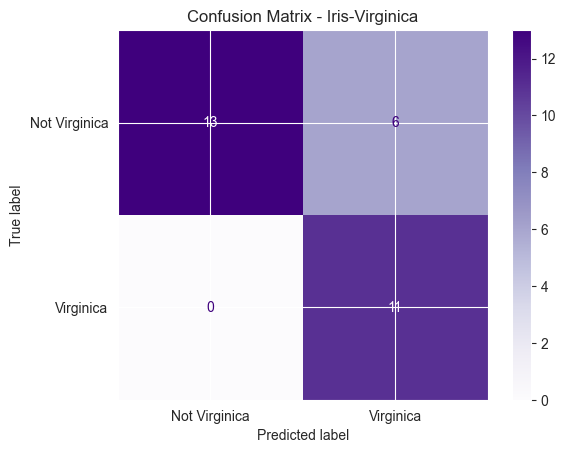

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_iris = SGDClassifier(random_state=42)
model_iris.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_iris.predict(X_test)
print("Classification Report for 'Iris-Virginica':\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Virginica", "Virginica"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - Iris-Virginica")
plt.show()

## 🎯 Threshold Tuning for Binary Classification

For the models implemented previously, let's adjust the decision threshold to achieve:

- **(a)** Maximum precision
- **(b)** Maximum recall
- **(c)** A balance (compromise) between precision and recall

We will use the `precision_recall_curve` function to inspect how precision and recall vary with the threshold.


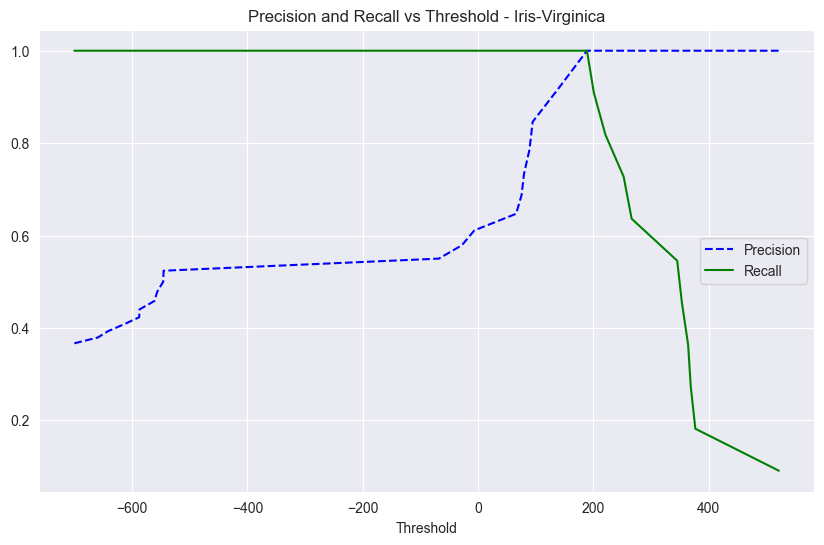

Threshold for maximum precision: 138.31 (Precision: 1.00)
Threshold for maximum recall: N/A (Recall: 1.00)
Best F1-score at threshold: 188.68 (F1: 1.00)


In [7]:
from sklearn.metrics import precision_recall_curve
# Repeat the same for the Iris-Virginica model
y_scores_iris = model_iris.decision_function(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_iris)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.title("Precision and Recall vs Threshold - Iris-Virginica")
plt.legend(loc="center right")
plt.grid(True)
plt.show()

# Max precision
max_prec_idx = precisions.argmax()
print(f"Threshold for maximum precision: {thresholds[max_prec_idx-1]:.2f} (Precision: {precisions[max_prec_idx]:.2f})")

# Max recall
max_rec_idx = recalls.argmax()
print(f"Threshold for maximum recall: {thresholds[max_rec_idx-1] if max_rec_idx > 0 else 'N/A'} (Recall: {recalls[max_rec_idx]:.2f})")

# Best F1
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
best_f1_idx = f1_scores.argmax()
print(f"Best F1-score at threshold: {thresholds[best_f1_idx]:.2f} (F1: {f1_scores[best_f1_idx]:.2f})")

## 📈 ROC Curve and AUC Score

In addition to precision-recall curves, ROC (Receiver Operating Characteristic) curves are another useful way to evaluate binary classifiers.

- The ROC curve plots the **True Positive Rate (Recall)** against the **False Positive Rate** at various threshold settings.
- The **AUC (Area Under Curve)** summarizes the overall performance:
    - AUC = 1.0 → perfect classifier
    - AUC = 0.5 → random guess

Let's visualize the ROC curves for both models and calculate the AUC score.


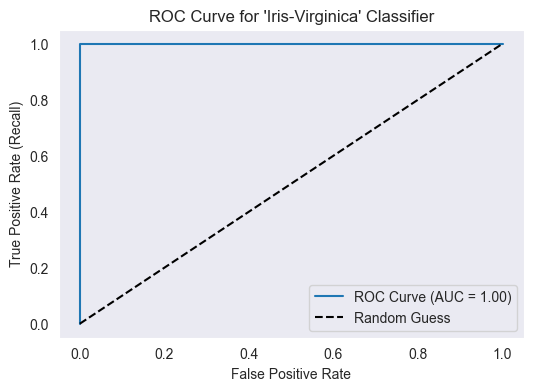

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC curve for Iris model
fpr, tpr, thresholds = roc_curve(y_test, model_iris.decision_function(X_test))
auc_score = roc_auc_score(y_test, model_iris.decision_function(X_test))

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for 'Iris-Virginica' Classifier")
plt.legend()
plt.grid()
plt.show()